In [78]:
import numpy as np
import math
import csv
from proj1_helpers import *
from Hadrien import *
from ML_methods import *
from features_engineering import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
y, tx, ids = load_csv_data("data_csv/train.csv", sub_sample=True)
#y = change_y_boundaries(y)
print("y has shape {0}".format(y.shape))
print("X has shape {0}".format(tx.shape))

y has shape (5000,)
X has shape (5000, 30)


# Data Set Analysis

## Spy Nan Values
White is NAN, black is finite value

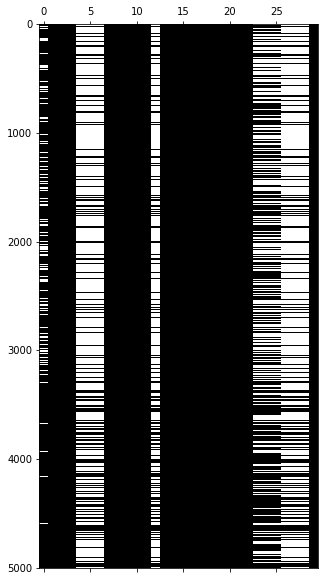

In [4]:
NAN_values_overview_matrix(tx, y)

## Feature Engineering

### Spy basic Feature
In this anaylsis, we aim to diplay the feature distributions. The NAN values will be ignored.

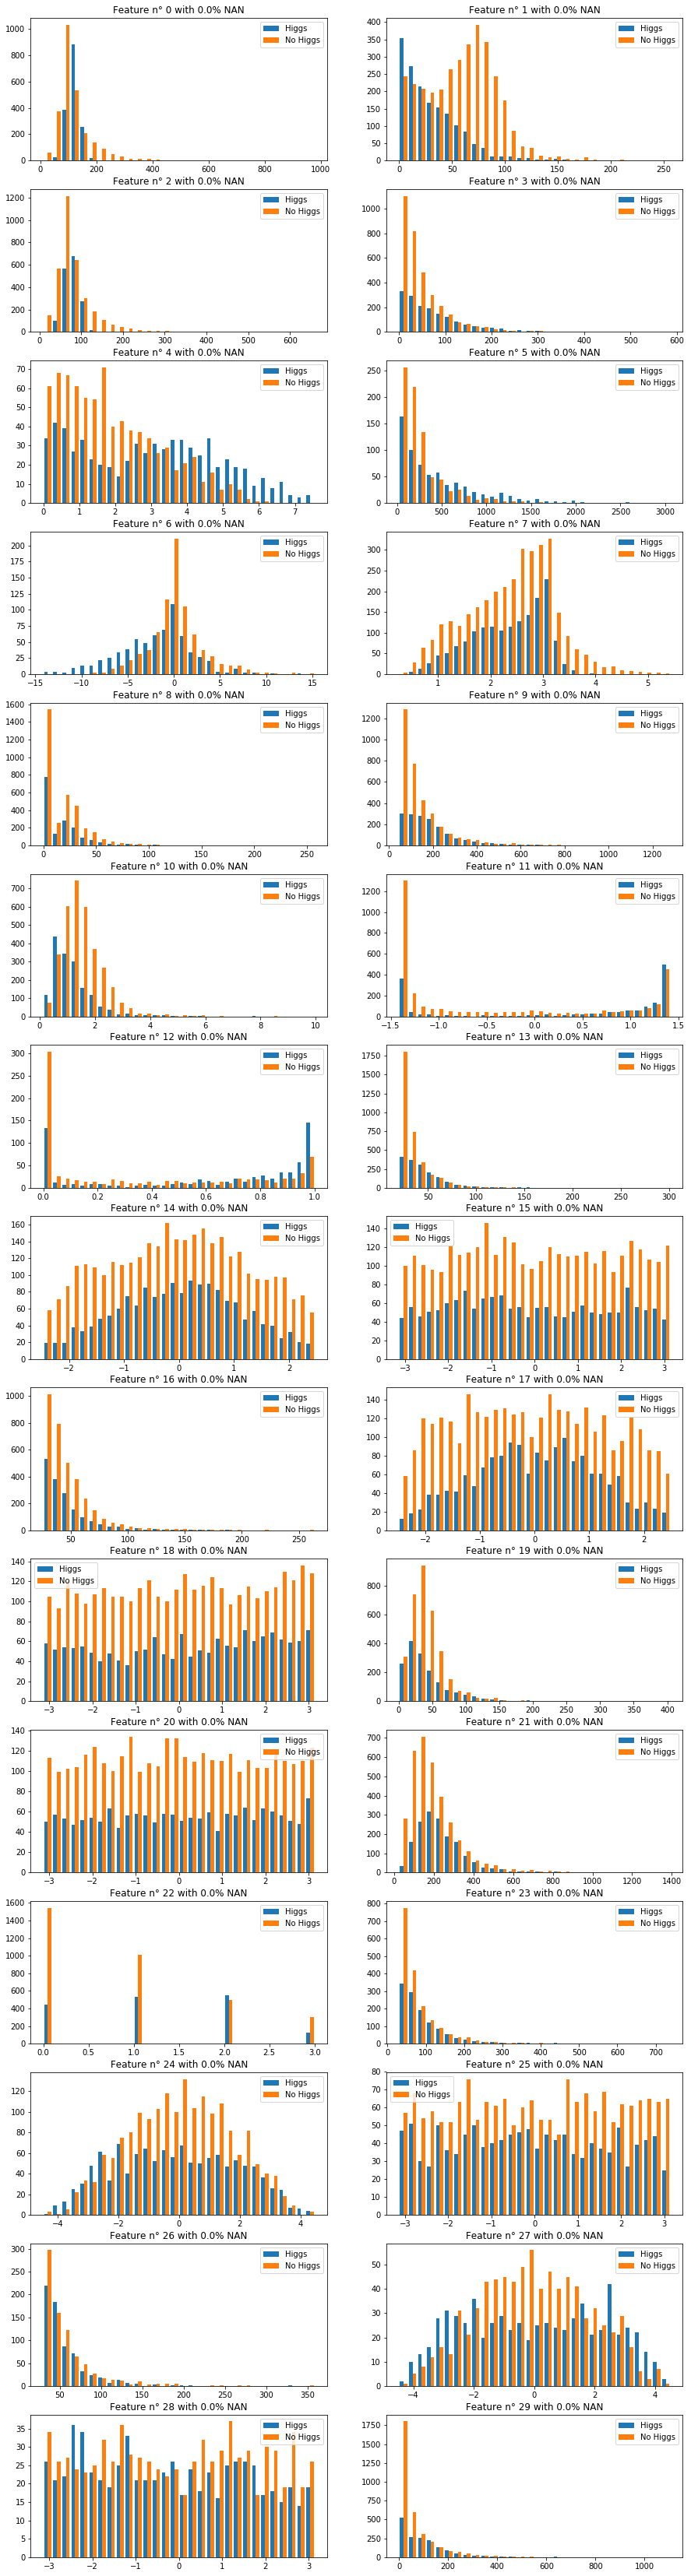

In [5]:
display_feature_distribution(y, tx, 30)

### NAN values processing

Transform Unknow values to NAN

In [6]:
tx_nan = transform_to_nan(tx, -900)

Add bool columns for NAN patterns

In [7]:
nan_columns_patterns = [0, 4, 23]
tx_nan_bool = add_bool_when_nan(tx_nan, nan_columns_patterns)

Put NAN values to mean

In [8]:
tx_nan_mean, mean = transform_to_mean(tx_nan_bool)

### Transform to log scale

We apply square transformation to column 6 so it will have exp distribution.
Columns number [0, 2, 3, 5, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29] seems to have exp distribution. Therefore, we will apply log.

In [9]:
features_square = [6]
tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

In [10]:
features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
tx_log = transform_feature_log(tx_square, features_log)

### Decompose angles
Features [11, 12, 14, 15, 17] are angles in [rad]. It is a good idea to decompose angles in cos/sin/tan/arccos/arcsin/arctan. Here np.sin() is good for feature 11 and 12, for the rest, we should find another function

In [11]:
features_sin = [11, 12, 14, 15, 17]
tx_angle_stand = standardize_angles(tx_log, features_sin)
tx_sin = transform_feature_sin(tx_angle_stand, features_sin)

### Combine Columns

### Standardize features
We standardize only the functions that have contineous spectrum

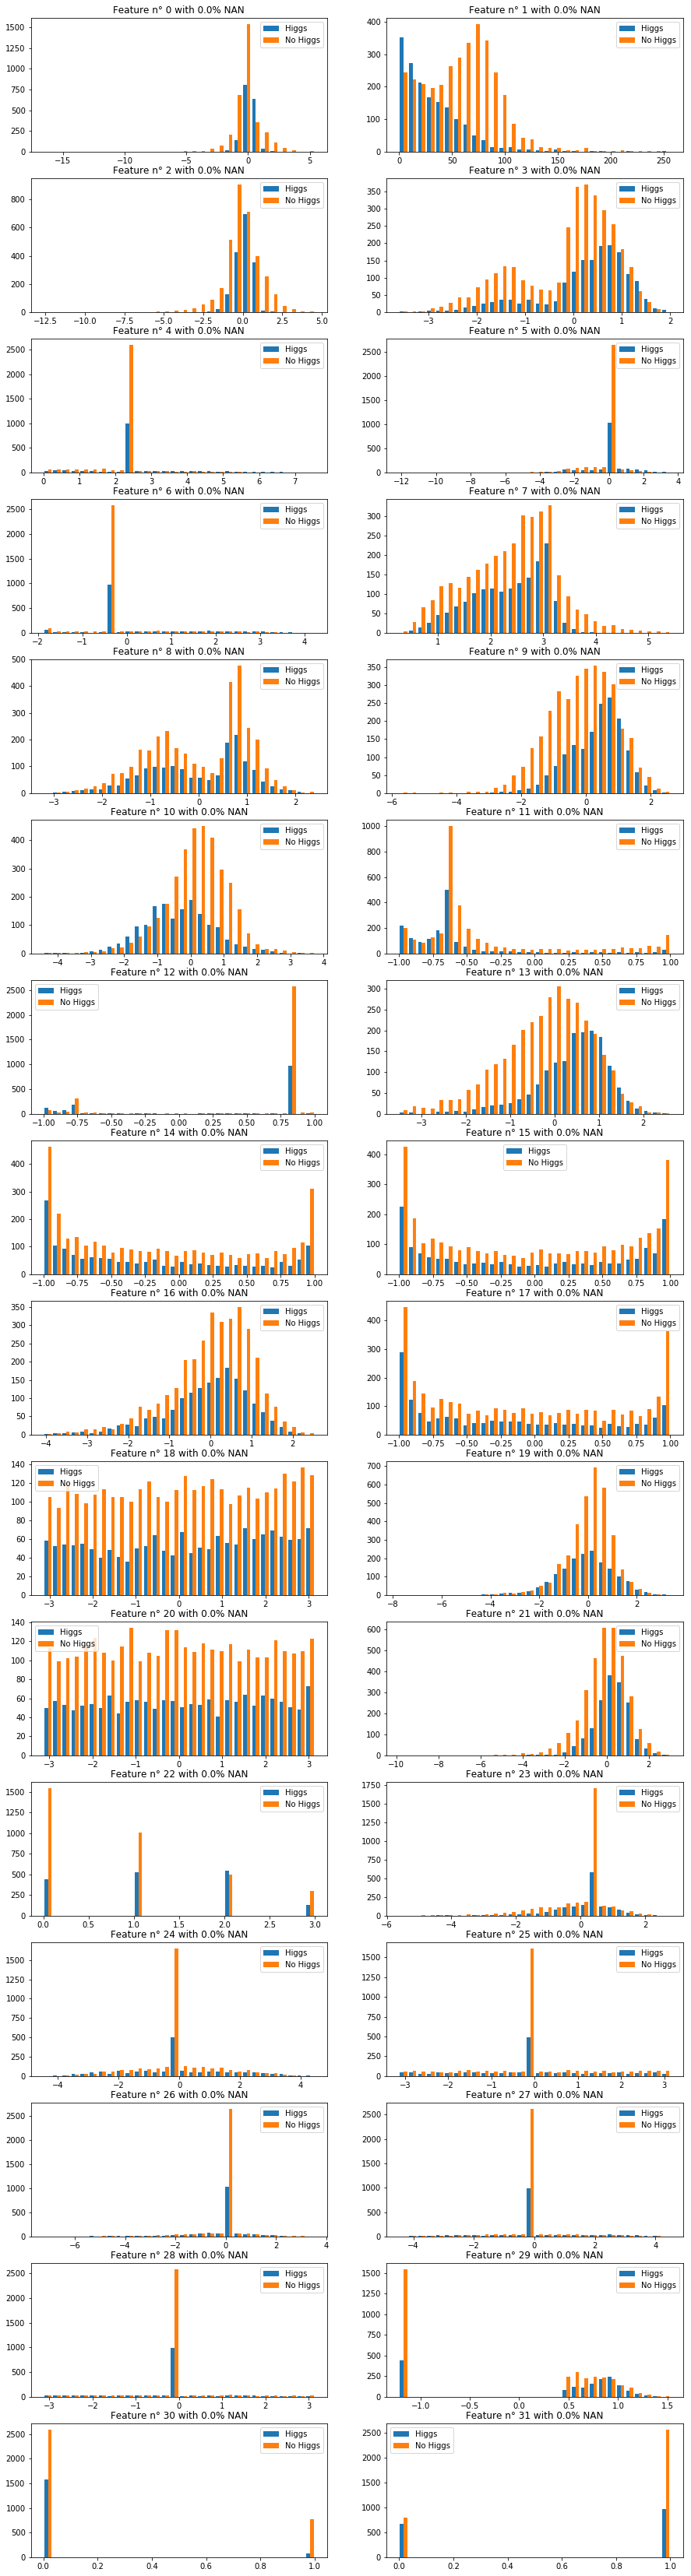

In [12]:
feature_std = features_log
tx_std, mean, std = standardize_features(tx_sin, feature_std)
display_feature_distribution(y, tx_std[:,:-1], 30)

### Feature 22

In [13]:
tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)

### Remove useless features
Features [14, 15, 17, 18, 20, 25, 28] have shity distributions. We remove them

In [14]:
features_removed = [14, 15, 17, 18, 20, 22, 25, 28]
tx_removed = np.delete(tx_22plus3, features_removed, axis = 1)
tx_removed.shape

(5000, 29)

# Train model 

### Train and Test models on small dataset

Gradient Descent, Loss : 0.724, Lambda : 0.0003792690190732246
Stochastic Gradient Descent, Loss : 0.702, Lambda : 0.0003792690190732246
Ridge Resgression, Loss : 0.69, Lambda : 0.0001


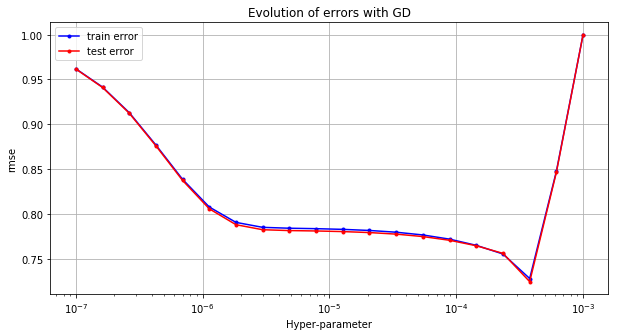

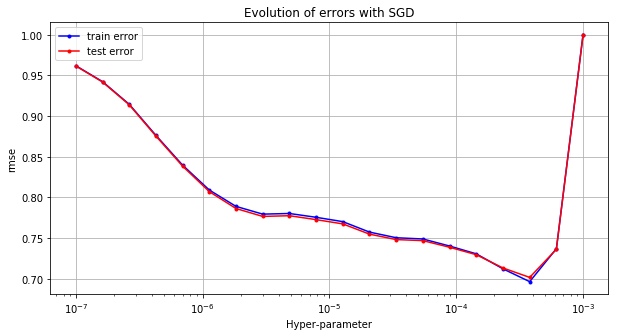

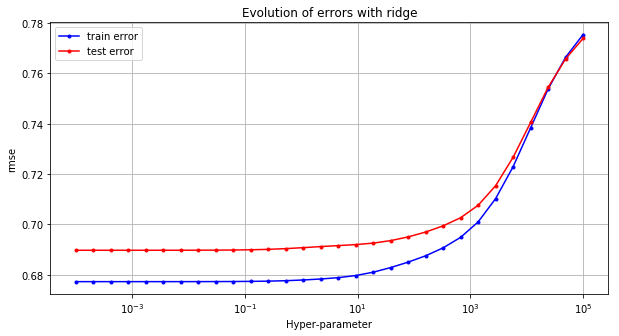

In [39]:
from train_model import *

initial_w = np.zeros(tx_removed.shape[1])
max_iter = 500
batch_size = 100

gradient_descent_exploration(y, tx_removed, 0.75, np.logspace(-7, -3, 20), initial_w, max_iter)
stochastic_gradient_descent_exploration(y, tx_removed, 0.75, np.logspace(-7, -3, 20), initial_w, batch_size, max_iter)
ridge_regression_exploration(y, tx_removed, 0.75, np.logspace(-4, 5, 30))

### Train and Test models on full dataset using cross validation

In [41]:
y_full, tx_full, ids = load_csv_data("data_csv/train.csv", sub_sample=False)
print("y has shape {0}".format(y_full.shape))
print("X has shape {0}".format(tx_full.shape))

y has shape (250000,)
X has shape (250000, 30)


In [47]:
nan_columns_patterns = [0, 4, 23]
features_square = [6]
features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
features_sin = [11, 12, 14, 15, 17]
features_std = features_log
features_removed = [14, 15, 17, 18, 20, 22, 25, 28]

In [46]:
def process_feature(tx, nan_columns_patterns, features_square, features_log, 
                    features_sin, features_std, features_removed):
    tx_nan = transform_to_nan(tx_full, -900)

    tx_nan_bool = add_bool_when_nan(tx_nan, nan_columns_patterns)

    tx_nan_mean, mean = transform_to_mean(tx_nan_bool)

    ### Transform to log scale

    tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

    tx_log = transform_feature_log(tx_square, features_log)

    ### Decompose angles
    tx_angle_stand = standardize_angles(tx_log, features_sin)
    tx_sin = transform_feature_sin(tx_angle_stand, features_sin)

    ### Standardize features
    tx_std, mean, std = standardize_features(tx_sin, features_std)

    ### Feature 22
    tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
    tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
    tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
    tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)

    ### Remove useless features
    tx_removed = np.delete(tx_22plus3, features_removed, axis = 1)
    tx_removed.shape
    
    return tx_removed, mean, std

In [71]:
tx_propre, mean_propre, std_propre = process_feature(tx_full,nan_columns_patterns, features_square, features_log, features_sin, features_std, features_removed)
print(tx_propre.shape)

(250000, 29)


Ridge Resgression, Loss : 0.704, Lambda : 0.001


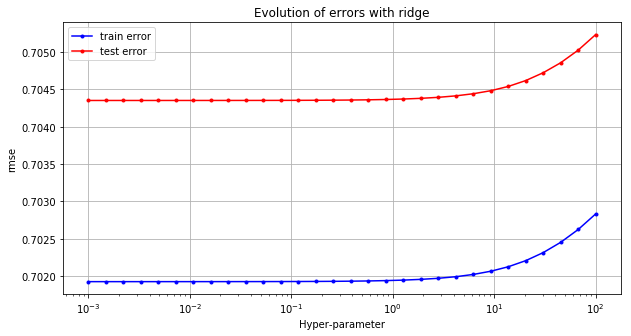

In [72]:
initial_w = np.zeros(tx_propre.shape[1])
ridge_regression_exploration(y_full, tx_propre, 0.8, np.logspace(-3, 2, 30))

Gradient Descent, Loss : 0.744, Lambda : 0.0004832930238571752


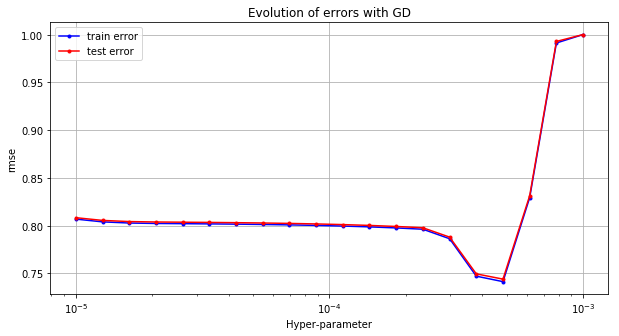

In [77]:
max_iter = 100
initial_w = np.zeros(tx_propre.shape[1])
gradient_descent_exploration(y_full, tx_propre, 0.8, np.logspace(-5, -3, 20), initial_w, max_iter)

Stochastic Gradient Descent, Loss : 0.742, Lambda : 0.00029763514416313193


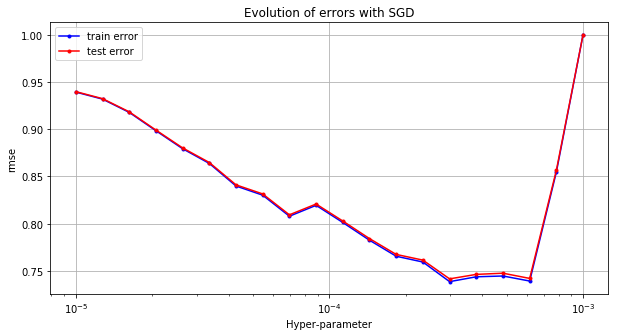

In [76]:
initial_w = np.zeros(tx_propre.shape[1])
max_iter = 10
batch_size = 100
stochastic_gradient_descent_exploration(y_full, tx_propre, 0.8, np.logspace(-5, -3, 20), initial_w, batch_size,  max_iter)

In [82]:
ws_best = ridge_regression(y_full, tx_propre, 1e-3)
ws_best

array([ 1.03727253e-01, -5.80831070e-03, -1.50906311e-01,  4.66496587e-02,
        2.60384150e-01, -1.66038192e-01,  4.54838846e-02,  1.70468774e-01,
       -1.88877204e-02,  9.55306162e-02, -1.03271717e-01, -1.11189230e-01,
       -1.57619722e-01,  1.33326291e-01,  7.22649202e-02, -1.70236508e-02,
        3.51505769e-03,  4.92351781e-02,  4.78304854e-05,  6.04541596e-02,
        1.45648876e-03,  1.66638836e-01, -1.59835840e-01, -5.41921616e-01,
       -8.11115544e-02, -8.11115526e-02, -4.60810273e-01, -1.31934578e+00,
       -1.63470762e+00])

### Prediction Accuracy

In [84]:
def prediction(x, y, split, max_iters, gamma, type_func):
    #split data
    x_tr,x_te,y_tr,y_te=split_data(x,y,split)

    if(type_func == 'gd'):
        initial_w_gd = np.zeros(x.shape[1])
        losses, ws = gradient_descent(y_tr, x_tr, initial_w_gd, max_iters, gamma)
    elif(type_func == 'sgd'):
        initial_w_sgd = np.zeros(x.shape[1])
        losses, ws = stochastic_gradient_descent(y_tr, x_tr, initial_w_sgd, 10, max_iters, gamma)
    elif(type_func == 'ls'):
        ws = least_squares(y, x)
        losses = compute_loss(y, x, ws)
    elif(type_func == 'ridge'):
        #lambdas = np.logspace(-100, 100, 200)
        #losses = []
        #for index, lambda_ in enumerate(lambdas):
            #ws = ridge_regression(y, x, lambda_)
            #losses.append(compute_loss(y, x, ws))
        lambdas = np.logspace(-100, 100, 200)
        losses = []
        ws = []
        for index, lambda_ in enumerate(lambdas):
            ws.append(ridge_regression(y, x, lambda_))
            losses.append(compute_loss(y, x, ws[index]))
       
    #losses
    l,wnew=minimum_loss_vector(losses, ws)

    #predictions
    y_pred=predict_labels(wnew, x_tr)

    #accuracy
    print(accuracy_calculator(y_pred, y_tr))

In [85]:
prediction(tx_propre, y_full, 0.8, 100, 0.1e-3, 'ridge')

0.75226


# Load Kaggle Test Set

### Perform features transformation

In [87]:
y_test, tx_test, ids_test = load_csv_data("data_csv/test.csv", sub_sample=False)
print("y has shape {0}".format(y_test.shape))
print("X has shape {0}".format(tx_test.shape))

tx_nan = transform_to_nan(tx_test, -900)

nan_columns_patterns = [0, 4, 23]
tx_nan_bool = add_bool_when_nan(tx_nan, nan_columns_patterns)

tx_nan_mean, mean = transform_to_mean(tx_nan_bool)

### Transform to log scale

features_square = [6]
tx_square = transform_feature_power(tx_nan_mean, features_square, 2)

features_log = [0, 2, 3, 5, 6, 8, 9, 10, 13, 16, 19, 21, 23, 26, 29]
tx_log = transform_feature_log(tx_square, features_log)

### Decompose angles
features_sin = [11, 12, 14, 15, 17]
tx_angle_stand = standardize_angles(tx_log, features_sin)
tx_sin = transform_feature_sin(tx_angle_stand, features_sin)



### Standardize features
feature_std = features_log
tx_std = standardize_features_according_to_train_set(tx_sin, feature_std, mean_propre, std_propre)

### Feature 22
tx_22plus0 = new_feature_PRI_jet_num(tx_std, 0.0)
tx_22plus1 = new_feature_PRI_jet_num(tx_22plus0, 1.0)
tx_22plus2 = new_feature_PRI_jet_num(tx_22plus1, 2.0)
tx_22plus3 = new_feature_PRI_jet_num(tx_22plus2, 3.0)

### Remove useless features
features_removed = [14, 15, 17, 18, 20, 22, 25, 28]
tx_removed = np.delete(tx_22plus3, features_removed, axis = 1)
tx_removed.shape


y has shape (568238,)
X has shape (568238, 30)


(568238, 29)

### Predict labels and Create CSV file

In [88]:
y_pred = predict_labels(ws_best, tx_removed)
create_csv_submission(ids_test, y_pred, 'Third_try')